In [66]:
import pandas as pd
import numpy as np
import quandl, math
df = quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \

Date                                                                   

2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   

2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   

2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   

2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   

2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   



            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \

Date                                                                   

2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   

2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   

2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   

2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   

2004-08-25          1.0  52.542193  54.167209  52

In [67]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [68]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close']
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume

Date                                                     

2004-08-19   50.322842  0.080730    0.324968   44659000.0

2004-08-20   54.322689  0.079217    7.227007   22834300.0

2004-08-23   54.869377  0.040494   -1.227880   18256100.0

2004-08-24   52.597363  0.076571   -5.726357   15247300.0

2004-08-25   53.164113  0.038868    1.183658    9188600.0


In [69]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

forecast_col = 'Adj. Close' 
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [70]:
df.dropna(inplace=True)

In [ ]:
X = np.array(df.drop(['label'], 1))
df.dropna(inplace=True)
y = np.array(df['label'])

X = preprocessing.scale(X)
y = np.array(df['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.SVR()

clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

print(confidence)

In [73]:
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.977029015313083


In [74]:
clf = LinearRegression(n_jobs=-1)

In [75]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9761179976369333

poly 0.6588149869173681

rbf 0.7974605880646447

sigmoid 0.8956482090557526


In [ ]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [77]:
df.dropna(inplace=True)

In [78]:
y = np.array(df['label'])

Nomor sample tidak sama.

In [79]:
df.dropna(inplace=True)

y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

print(confidence)

ValueError: Found input variables with inconsistent numbers of samples: [3354, 3389]

In [80]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[828.88514203 839.47539289 838.69108743 830.10565761 826.78908594

 809.59868883 786.5505108  814.79008125 811.3164158  816.63544987

 790.72924287 821.91339284 835.81449308 821.80834816 830.64711177

 820.96750926 826.72243449 817.84901168 817.77540198 841.62042736

 867.49222974 854.67207766 855.33100264 836.45503765 854.32977018

 845.18706036 865.17952258 853.52228091 880.43382469 858.42113113

 856.04121931 859.27580387 876.08149926 874.72555085 833.139174  ] 0.8956482090557526 35


In [81]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [82]:
df['Forecast'] = np.nan

In [83]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400 #24×60×60
next_unix = last_unix + one_day

In [84]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]


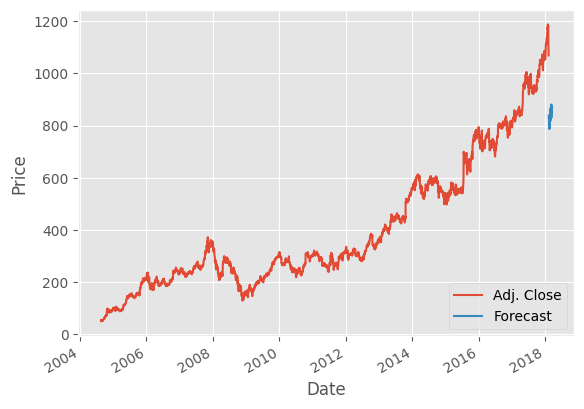

In [85]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()